<a href="https://colab.research.google.com/github/ElkinAleman/DataScience/blob/main/G_pareto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso Práctico: Funciones de activación RNAs

### Enunciado y contexto del ejercicio

Las funciones de activación se corresponden con una serie de funciones matemáticas que se utilizan en la mayoría de los algoritmos de Deep Learning para realizar transformaciones sobre las entradas que reciben las neuronas artificiales que forman parte de una red neuronal artificial.

**En este ejercicio práctico se propone la implementación en Python 3 de tres de las funciones de activación más populares en el diseño de redes neuronales artificiales profundas, las funciones ReLu, Sigmoid y Tanh.**

¡Completa todos los apartados que se muestran a continuación para conseguir implementar estas funciones!

### 1. Función de activación ReLu

La función de activación [ReLu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)), viene determinada por la siguiente expresión matemática:

$${\displaystyle f(x)=\max(0,x)}$$

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Crea una función en Python que calcule el resultado de aplicar la función ReLu sobre una entrada x. Ten en cuenta que x debe ser considerado un valor numérico.
</div>

**Pista:** Cuando termines de programar la función, comprueba si el resultado es correcto utilizando la gráfica que se muestra a continuación.

**texto en negrita**![image.png](attachment:image.png)


In [ ]:
def ReLu(x):
  f = max(0,x)
  return f

### 2. Función de activación Sigmoid

La función de activación [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function), viene determinada por la siguiente expresión matemática:

$${\displaystyle f(x)={\frac {1}{1+e^{-x}}}}$$

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Crea una función en Python que calcule el resultado de aplicar la función Sigmoid sobre una entrada x. Ten en cuenta que x debe ser considerado un valor numérico.
</div>

**Pista:** Cuando termines de programar la función, comprueba si el resultado es correcto utilizando la gráfica que se muestra a continuación.

![image.png](attachment:image.png)

**Pista 2**: Como puedes observar en la fórmula anterior, para calcular la función Sigmoid necesitas conocer el valor de la constante de Euler, representada mediante la letra **_e_**. Python no incorpora esta constante por defecto, pero puedes importarla con la sentencia que se muestra a continuación.

In [ ]:
from math import e

In [ ]:
print(e)

2.718281828459045


In [ ]:
def sigmoid(x):
  f = 1/(1+e**(-x))
  return f

In [ ]:
sigmoid(0)

0.5

### 3. Función de activación Tanh

La [función de activación Tanh](https://en.wikipedia.org/wiki/Hyperbolic_functions), viene determinada por la siguiente expresión matemática:

$$\tanh(x) = \frac {\sinh(x)} {\cosh(x)}$$

Como puedes observar, para implementar la función Tanh, primero tienes que implementar las funciones:

#### Sinh:
$$\sinh(x) = \frac {e^{x} - e^{-x}} {2}$$

#### Cosh:
$$\cosh(x) = \frac {e^{x} + e^{-x}} {2}$$

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Crea una función en Python que calcule el resultado de aplicar la función Tanh sobre una entrada x. Ten en cuenta que x debe ser considerado un valor numérico.
</div>

**Pista:** Cuando termines de programar la función, comprueba si el resultado es correcto utilizando la gráfica que se muestra a continuación.

![image-2.png](attachment:image-2.png)

**Pista 2**: Como puedes observar en la fórmula anterior, para calcular la función Sigmoid necesitas conocer el valor de la constante de Euler, representada mediante la letra **_e_**. Python no incorpora esta constante por defecto, pero puedes importarla con la sentencia que se muestra a continuación.

# **Gráfico de Pareto**

Durante el último trimestre, el área de calidad ha reportado fallas en productos devueltos por clientes. La dirección quiere identificar qué causas generan más impacto para priorizar acciones correctivas.

Visualizar las principales causas de fallas en productos devueltos, ordenadas de mayor a menor impacto, y determinar cuáles explican el 80% de los problemas.


In [ ]:

# Datos reales simulados: causas de devolución y frecuencia en el trimestre
data = {
    'Causa': [
        'Falla del motor',
        'Problema en el panel de control',
        'Defecto en el cableado',
        'Mal ensamblaje',
        'Error del software',
        'Fuga de agua',
        'Daño en empaque',
        'Sensor defectuoso'
    ],
    'Frecuencia': [120, 90, 70, 55, 45, 30, 20, 15]
}

# Crear DataFrame y calcular porcentajes
df = pd.DataFrame(data)
df.head()


,Causa,Frecuencia
0,Falla del motor,120
1,Problema en el panel de control,90
2,Defecto en el cableado,70
3,Mal ensamblaje,55
4,Error del software,45


In [ ]:
df = df.sort_values(by='Frecuencia', ascending=False)
df['% del total'] = 100 * df['Frecuencia'] / df['Frecuencia'].sum()
df['% acumulado'] = df['% del total'].cumsum()
df.head()

,Causa,Frecuencia,% del total,% acumulado
0,Falla del motor,120,26.966292,26.966292
1,Problema en el panel de control,90,20.224719,47.191011
2,Defecto en el cableado,70,15.730337,62.921348
3,Mal ensamblaje,55,12.359551,75.280899
4,Error del software,45,10.112360,85.393258


<ipython-input-4-859557dba974>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['Causa'], rotation=45, ha='right')


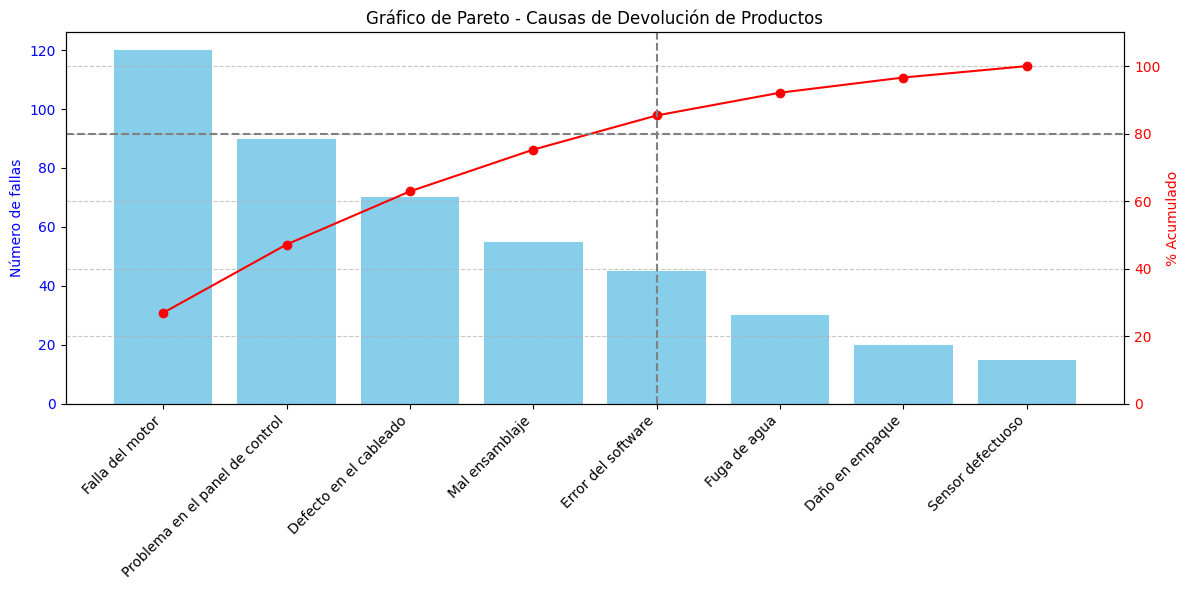

In [ ]:

fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras
ax1.bar(df['Causa'], df['Frecuencia'], color='skyblue')
ax1.set_ylabel('Número de fallas', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(df['Causa'], rotation=45, ha='right')

# Línea: porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(df['Causa'], df['% acumulado'], color='red', marker='o')
ax2.set_ylabel('% Acumulado', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 110)

# Línea de referencia 80%
ax2.axhline(80, color='gray', linestyle='--')
# Línea vertical en el punto donde se alcanza el 80%
for i, val in enumerate(df['% acumulado']):
    if val >= 80:
        ax2.axvline(x=i, color='gray', linestyle='--')
        break

plt.title('Gráfico de Pareto - Causas de Devolución de Productos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


El gráfico revela que tres causas principales —Falla del motor, Problema en el panel de control y Defecto en el cableado— representan más del 75% de las devoluciones totales.
Si sumamos la cuarta causa (Mal ensamblaje), se supera el 80% del impacto total.

Si se enfoca los recursos de calidad en estas 3-4 causas prioritarias, podemos reducir significativamente las devoluciones.